 # Patient Readmission Dataset with Decision Trees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Data and EDA

In [2]:
df = pd.read_csv('Readmission.csv')

In [3]:
df.head()

,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,Patient_ID,readmitted
0,52,Male,Heart Disease,3,9,3,Home,1,1
1,47,Female,Diabetes,2,4,0,Skilled Nursing Facility,2,0
2,72,Female,Heart Disease,7,12,4,Home,3,1
3,18,Female,COPD,5,14,3,Home,4,1
4,32,Male,Heart Disease,9,2,4,Rehabilitation Facility,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                2000 non-null   int64 
 1   gender             2000 non-null   object
 2   primary_diagnosis  2000 non-null   object
 3   num_procedures     2000 non-null   int64 
 4   days_in_hospital   2000 non-null   int64 
 5   comorbidity_score  2000 non-null   int64 
 6   discharge_to       2000 non-null   object
 7   Patient_ID         2000 non-null   int64 
 8   readmitted         2000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 140.8+ KB


In [5]:
df.describe()

,age,num_procedures,days_in_hospital,comorbidity_score,Patient_ID,readmitted
count,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000
mean,54.318000,4.563000,7.41950,2.05300,1000.500000,0.486000
std,20.872631,2.846767,3.99944,1.40932,577.494589,0.499929
min,18.000000,0.000000,1.00000,0.00000,1.000000,0.000000
25%,36.000000,2.000000,4.00000,1.00000,500.750000,0.000000
50%,55.000000,5.000000,7.00000,2.00000,1000.500000,0.000000
75%,72.000000,7.000000,11.00000,3.00000,1500.250000,1.000000
max,89.000000,9.000000,14.00000,4.00000,2000.000000,1.000000


In [6]:
df['readmitted'].value_counts()

readmitted
0    1028
1     972
Name: count, dtype: int64

The Target Class is normally distributed

#### EDA

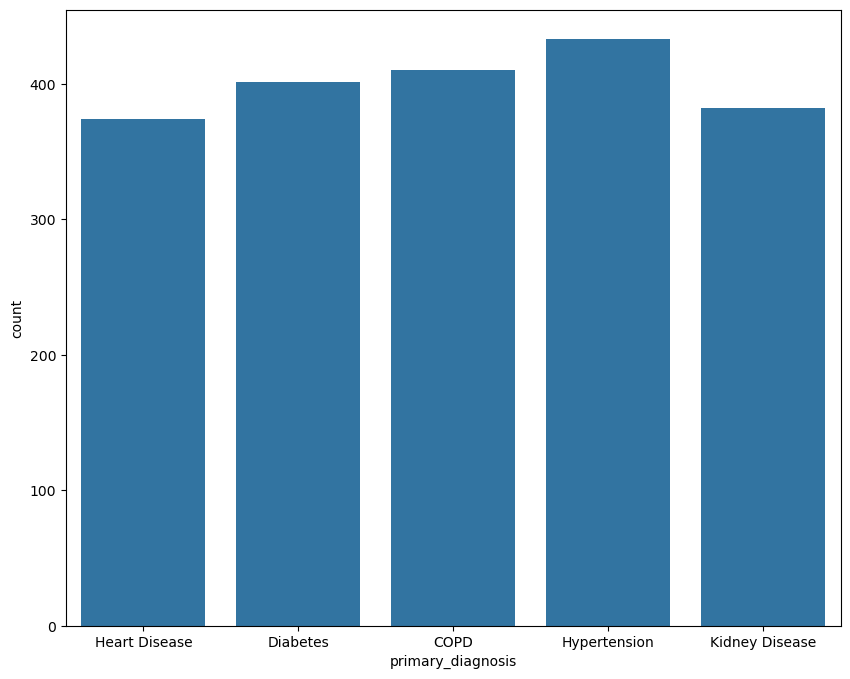

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'primary_diagnosis', data = df)
plt.show()

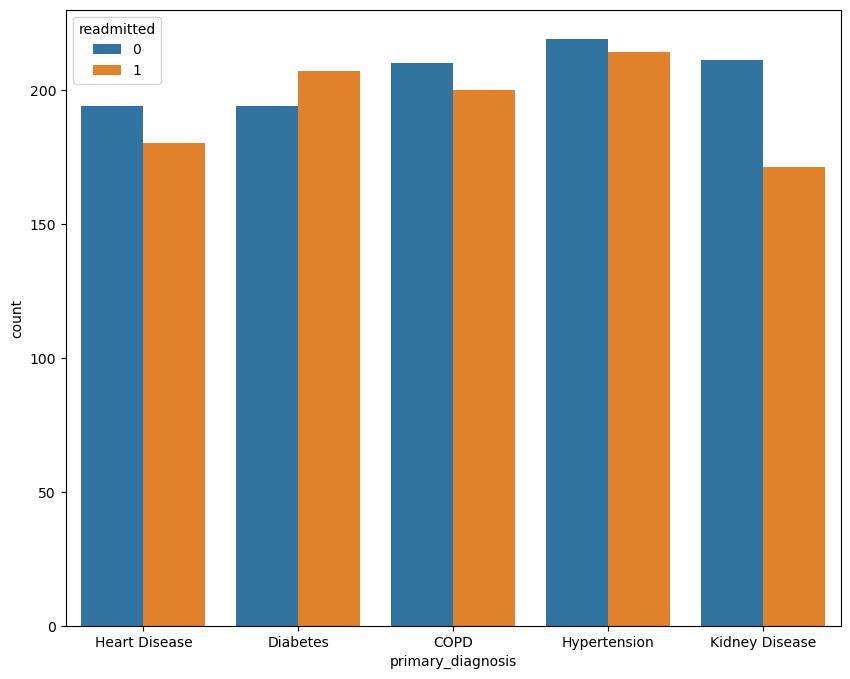

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'primary_diagnosis', data = df, hue='readmitted')
plt.show()

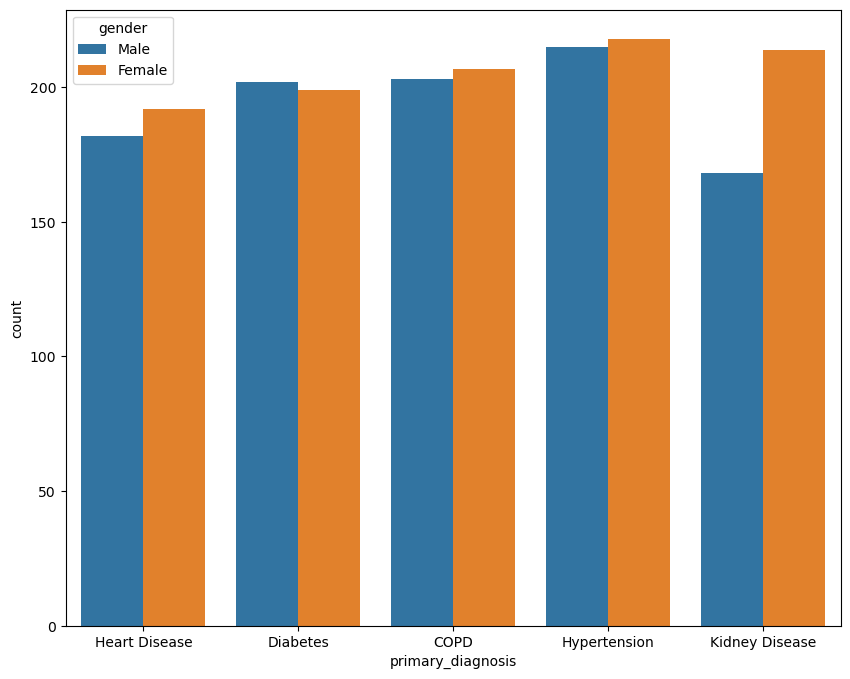

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'primary_diagnosis', hue = 'gender', data = df)
plt.show()

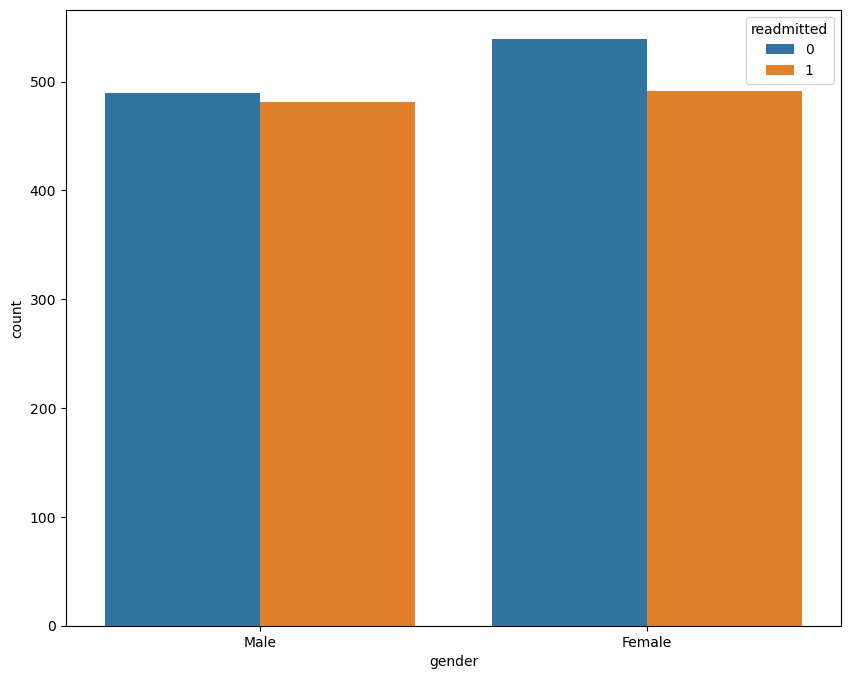

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'gender', data = df, hue='readmitted')
plt.show()

<Figure size 1000x800 with 0 Axes>

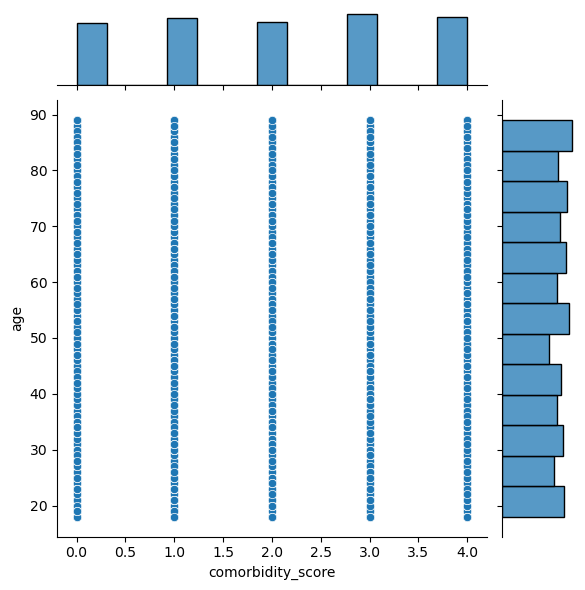

In [11]:
plt.figure(figsize=(10,8))
sns.jointplot(x= 'comorbidity_score', y='age', data = df)
plt.show()

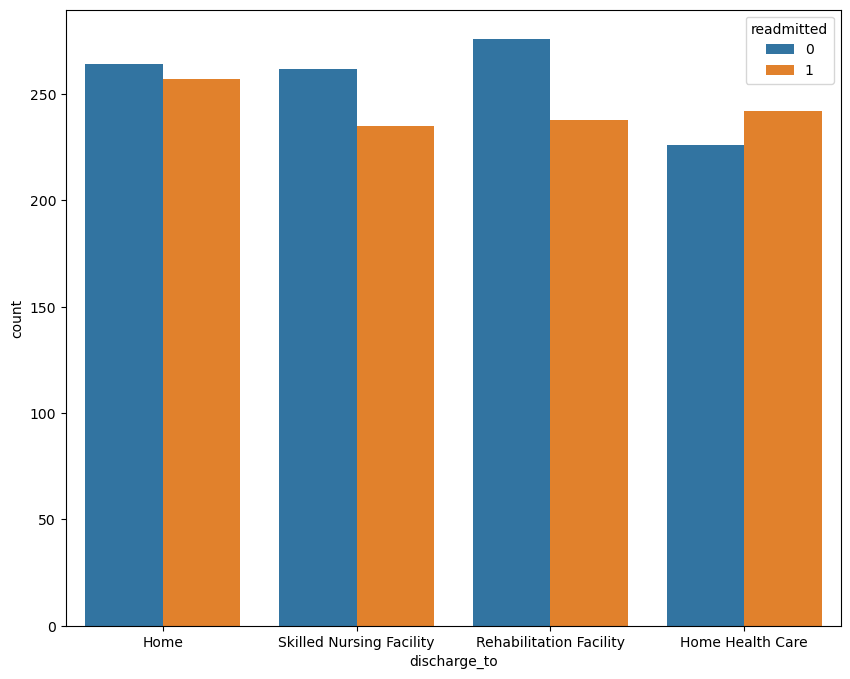

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x= 'discharge_to', data = df, hue='readmitted')
plt.show()

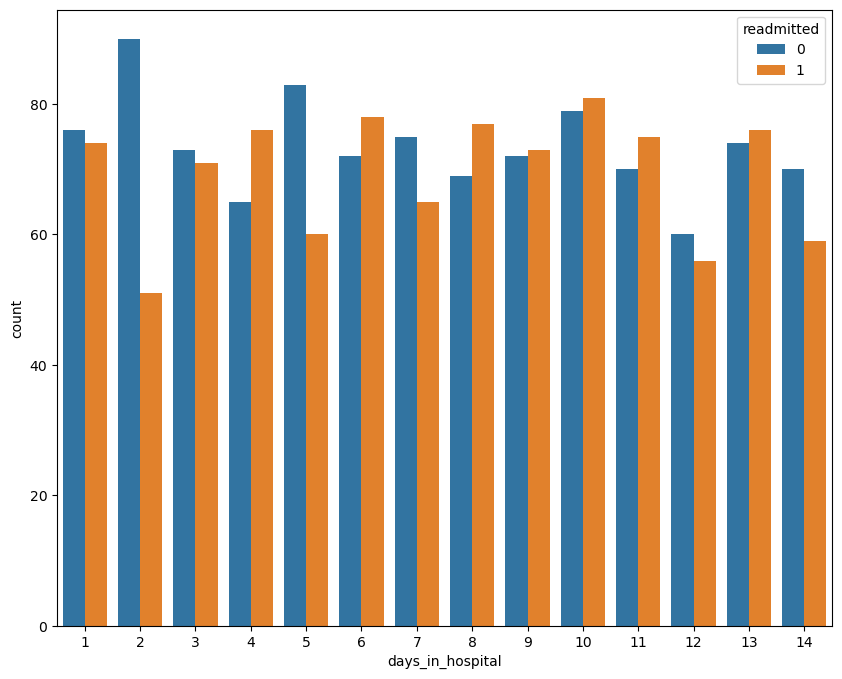

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'days_in_hospital', data = df, hue = 'readmitted')
plt.show()

<Figure size 1000x800 with 0 Axes>

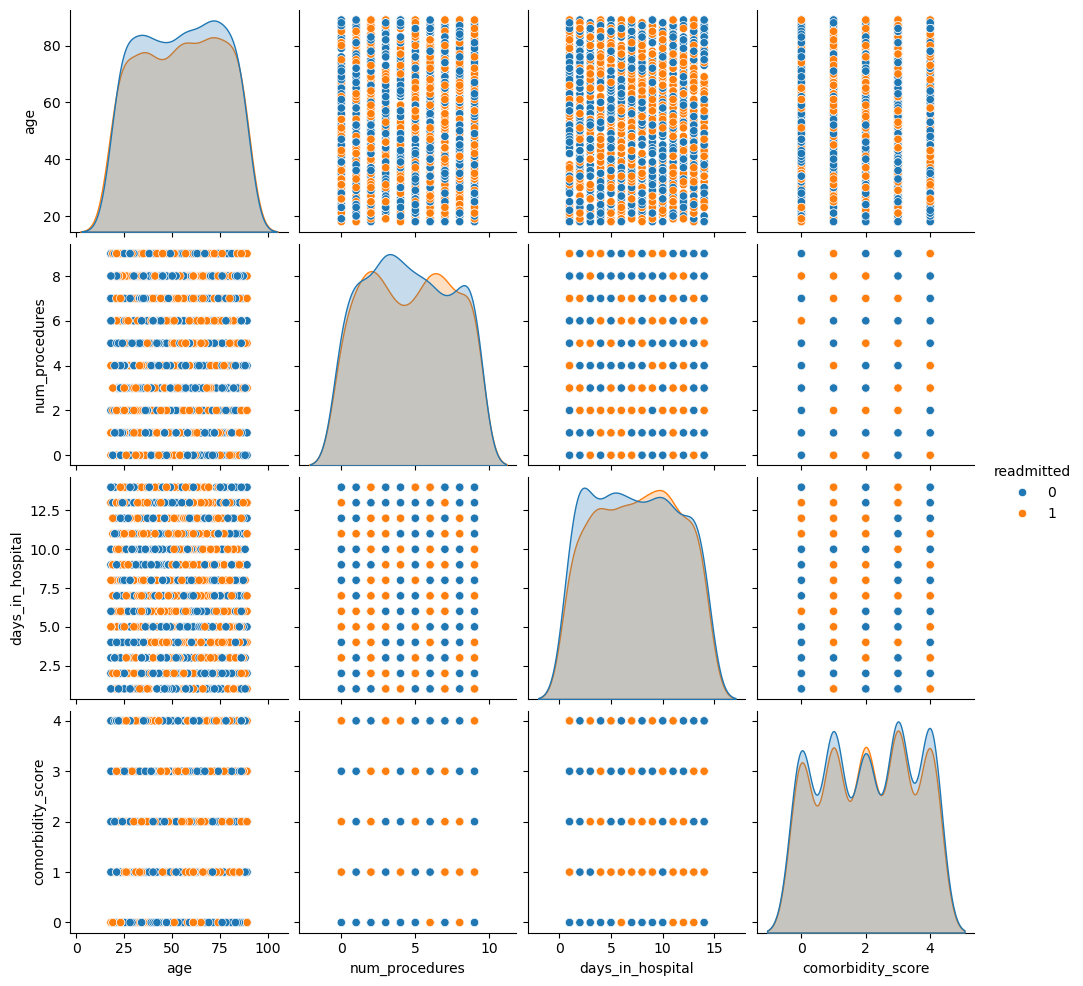

In [14]:
plt.figure(figsize=(10,8))
sns.pairplot(df.drop('Patient_ID',axis=1), hue='readmitted')
plt.show()

In [15]:
df.columns

Index(['age', 'gender', 'primary_diagnosis', 'num_procedures',
       'days_in_hospital', 'comorbidity_score', 'discharge_to', 'Patient_ID',
       'readmitted'],
      dtype='object')

### DATA CLEANING AND PREPARATION

In [16]:
df.head()

,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,Patient_ID,readmitted
0,52,Male,Heart Disease,3,9,3,Home,1,1
1,47,Female,Diabetes,2,4,0,Skilled Nursing Facility,2,0
2,72,Female,Heart Disease,7,12,4,Home,3,1
3,18,Female,COPD,5,14,3,Home,4,1
4,32,Male,Heart Disease,9,2,4,Rehabilitation Facility,5,1


In [17]:
df_2 = pd.get_dummies(df, columns = ['gender','primary_diagnosis', 'discharge_to'], drop_first = True)

In [18]:
df_2.head()

,age,num_procedures,days_in_hospital,comorbidity_score,Patient_ID,readmitted,gender_Male,primary_diagnosis_Diabetes,primary_diagnosis_Heart Disease,primary_diagnosis_Hypertension,primary_diagnosis_Kidney Disease,discharge_to_Home Health Care,discharge_to_Rehabilitation Facility,discharge_to_Skilled Nursing Facility
0,52,3,9,3,1,1,True,False,True,False,False,False,False,False
1,47,2,4,0,2,0,False,True,False,False,False,False,False,True
2,72,7,12,4,3,1,False,False,True,False,False,False,False,False
3,18,5,14,3,4,1,False,False,False,False,False,False,False,False
4,32,9,2,4,5,1,True,False,True,False,False,False,True,False


In [19]:
final_data = df_2.drop('Patient_ID', axis=1)

In [20]:
final_data.head()

,age,num_procedures,days_in_hospital,comorbidity_score,readmitted,gender_Male,primary_diagnosis_Diabetes,primary_diagnosis_Heart Disease,primary_diagnosis_Hypertension,primary_diagnosis_Kidney Disease,discharge_to_Home Health Care,discharge_to_Rehabilitation Facility,discharge_to_Skilled Nursing Facility
0,52,3,9,3,1,True,False,True,False,False,False,False,False
1,47,2,4,0,0,False,True,False,False,False,False,False,True
2,72,7,12,4,1,False,False,True,False,False,False,False,False
3,18,5,14,3,1,False,False,False,False,False,False,False,False
4,32,9,2,4,1,True,False,True,False,False,False,True,False


## TRAINING AND SPLITTING THE DATA

In [21]:
X = final_data.drop('readmitted', axis=1)
y = final_data['readmitted']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=101)

## DECISION TREE CLASSIFIER

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier(class_weight={0:1, 1:2}, max_depth = 3)

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2}, max_depth=3)

In [27]:
predictions = dtree.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.56      0.09      0.15       556
           1       0.50      0.93      0.65       544

    accuracy                           0.50      1100
   macro avg       0.53      0.51      0.40      1100
weighted avg       0.53      0.50      0.40      1100



[[ 48 508]
 [ 37 507]]


After Training, with some parameters, the model is biased towards "1", which is acceptable as this is a medical model

### TRAINING A RANDOM FOREST MODEL WITH THE SAME PARAMETERS

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier(n_estimators = 200,max_depth = 3,class_weight={0: 1.75, 1: 2})

In [52]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1.75, 1: 2}, max_depth=3,
                       n_estimators=200)

In [53]:
pred = rfc.predict(X_test)

In [54]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.49      0.29      0.37       556
           1       0.49      0.69      0.57       544

    accuracy                           0.49      1100
   macro avg       0.49      0.49      0.47      1100
weighted avg       0.49      0.49      0.47      1100



[[163 393]
 [170 374]]


### TESTING WITH A NEW DATASET

In [56]:
new_df = pd.read_csv('train_df.csv')

In [57]:
new_df.head()

,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted
0,69,Male,Heart Disease,1,2,1,Home Health Care,0
1,32,Female,COPD,2,13,2,Rehabilitation Facility,0
2,89,Male,Diabetes,1,7,1,Home,0
3,78,Male,COPD,9,2,2,Skilled Nursing Facility,0
4,38,Male,Diabetes,6,4,4,Rehabilitation Facility,0


In [60]:
X_new = pd.get_dummies(new_df.drop('readmitted',axis =1),
                       columns = ['gender','primary_diagnosis','discharge_to'],
                       drop_first=True)
y_new = new_df['readmitted']

In [62]:
new_pred = rfc.predict(X_new)

In [63]:
print(classification_report(y_new,new_pred))
print('\n')
print(confusion_matrix(y_new,new_pred))

              precision    recall  f1-score   support

           0       0.80      0.32      0.46      4060
           1       0.18      0.66      0.29       940

    accuracy                           0.38      5000
   macro avg       0.49      0.49      0.37      5000
weighted avg       0.69      0.38      0.42      5000



[[1290 2770]
 [ 319  621]]
